# Diseño de un Data Mart
**UCA:** Minería de Datos  
**Carrera:** Ciencia de Datos para Negocios  
**Grupo:** 502
**Alumno:** Daniel Cureño Martínez 

**Fecha:** 30/09/2025


## Objetivo
Diseñar el modelo relacional de un Data Mart para **dos negocios distintos**, considerando requerimientos de análisis, estructura y normalización necesarios para una solución eficiente y escalable.

## 1. Selección de Negocios  

### Negocio 1: Librería en línea  
- **Giro:** Comercio electrónico especializado en libros físicos y digitales.  
- **Objetivo comercial:** Incrementar ventas, fidelizar clientes y optimizar inventario.  
- **Necesidades analíticas:**  
  - Analizar ventas por categoría, autor y formato.  
  - Identificar hábitos de compra por cliente.  
  - Predecir demanda para gestión de inventario.  

### Negocio 2: Gimnasio deportivo  
- **Giro:** Servicios de acondicionamiento físico.  
- **Objetivo comercial:** Aumentar membresías, mejorar retención de clientes y optimizar horarios de clases.  
- **Necesidades analíticas:**  
  - Medir ingresos por tipo de membresía.  
  - Analizar asistencia a clases y uso de servicios.  
  

## 2. Definición de Procesos de Negocio  

### Librería en línea  
1. **Ventas** → Datos: ID transacción, cliente, libro, cantidad, precio, método de pago, fecha.  
2. **Inventario** → Datos: ID libro, stock disponible, reposiciones, bajas.  

### Gimnasio deportivo  
1. **Gestión de membresías** → Datos: ID membresía, cliente, plan, inicio/fin, pagos.  
2. **Asistencia a clases** → Datos: ID clase, cliente, fecha, instructor, sala.

## 3. Identificación de Hechos y Dimensiones  

### Librería en línea  
- **Tabla de Hechos:** `Ventas`  
- **Dimensiones:**  
  1. `Tiempo` (día, mes, año, trimestre)  
  2. `Producto` (libro, autor, género, formato)  
  3. `Cliente` (nombre, edad, género, ubicación)  
  4. `Método de pago` (tarjeta, transferencia, PayPal, efectivo)  

### Gimnasio deportivo  
- **Tablas de Hechos:** `Membresías`, `Asistencias`  
- **Dimensiones:**  
  1. `Tiempo` (día, mes, año, horario)  
  2. `Cliente` (edad, género, ubicación, antigüedad)  
  3. `Clase` (tipo, nivel, duración)  
  4. `Instructor` (nombre, especialidad, certificaciones)  

## 4. Modelo Estrella o Copo de Nieve  
- **Modelo elegido:** Estrella ⭐  
- **Justificación:**  
  - Fácil de entender para usuarios de negocio.  
  - Optimiza consultas OLAP.  
  - Adecuado para análisis de ventas y membresías.  

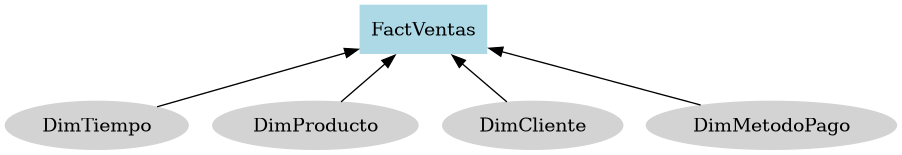

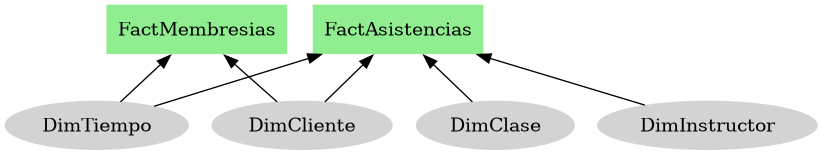

In [4]:
from graphviz import Digraph
from IPython.display import Image, display

# Modelo Estrella Librería
g1 = Digraph('Libreria', format='png')
g1.attr(rankdir='BT')

# Tabla de Hechos
g1.node('FactVentas', shape='box', style='filled', color='lightblue')

# Dimensiones
dims_libreria = ['DimTiempo', 'DimProducto', 'DimCliente', 'DimMetodoPago']
for d in dims_libreria:
    g1.node(d, shape='ellipse', style='filled', color='lightgrey')
    g1.edge(d, 'FactVentas')

# Render y mostrar en celda
g1.render('modelo_libreria', format='png', cleanup=True)
display(Image(filename='modelo_libreria.png'))


# Modelo Estrella Gimnasio
g2 = Digraph('Gimnasio', format='png')
g2.attr(rankdir='BT')

# Tablas de Hechos
g2.node('FactMembresias', shape='box', style='filled', color='lightgreen')
g2.node('FactAsistencias', shape='box', style='filled', color='lightgreen')

# Dimensiones
g2.node('DimTiempo', shape='ellipse', style='filled', color='lightgrey')
g2.node('DimCliente', shape='ellipse', style='filled', color='lightgrey')
g2.node('DimClase', shape='ellipse', style='filled', color='lightgrey')
g2.node('DimInstructor', shape='ellipse', style='filled', color='lightgrey')

# Relaciones
g2.edge('DimTiempo', 'FactMembresias')
g2.edge('DimCliente', 'FactMembresias')

g2.edge('DimTiempo', 'FactAsistencias')
g2.edge('DimCliente', 'FactAsistencias')
g2.edge('DimClase', 'FactAsistencias')
g2.edge('DimInstructor', 'FactAsistencias')

# Render y mostrar en celda
g2.render('modelo_gimnasio', format='png', cleanup=True)
display(Image(filename='modelo_gimnasio.png'))



## 5. Normalización  
- Todas las **dimensiones** se mantienen normalizadas.  
- Excepción: `DimProducto` (Librería) se desnormaliza incluyendo autor y género para evitar múltiples joins. 

## 6. Llaves Primarias y Foráneas  

### Librería en línea  
- **Hecho Ventas**  
  - PK: `id_venta`  
  - FK: `id_cliente`, `id_producto`, `id_tiempo`, `id_metodo_pago`  

- **DimCliente** → PK: `id_cliente`  
- **DimProducto** → PK: `id_producto`  
- **DimTiempo** → PK: `id_tiempo`  
- **DimMetodoPago** → PK: `id_metodo_pago`  

### Gimnasio deportivo  
- **Hecho Membresías**  
  - PK: `id_membresia`  
  - FK: `id_cliente`, `id_tiempo`  

- **Hecho Asistencias**  
  - PK: `id_asistencia`  
  - FK: `id_cliente`, `id_tiempo`, `id_clase`, `id_instructor`  

- **DimCliente** → PK: `id_cliente`  
- **DimClase** → PK: `id_clase`  
- **DimInstructor** → PK: `id_instructor`  
- **DimTiempo** → PK: `id_tiempo`